In [ ]:
#importing the required libraries
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
from sklearn.preprocessing       import MinMaxScaler
from sklearn.model_selection     import train_test_split
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections as col


import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [ ]:
import CNN_Model
import SVM_Model
import LSTM_Model

In [ ]:
#Mounting the colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to your CSV file within your Google Drive

file_path ='/content/drive/MyDrive/Concrete/data.csv'

# Load the dataset using pandas
new = pd.read_csv(file_path)

In [ ]:
from CNN_Model import CNNModel


In [ ]:
# Load the dataset using pandas
new=pd.read_csv('data.csv')

In [ ]:
new

Temperature  Heating rate  Maintenance  Specimen type  Cement  Water  \
0            800           6.0          1.0              1   262.5  210.0   
1            800           6.0          1.0              1   357.5  176.0   
2            800           6.0          1.0              1   357.5  176.0   
3            800           6.0          1.0              1   357.5  176.0   
4             25           6.0          0.0              1   262.5  210.0   
..           ...           ...          ...            ...     ...    ...   
321          200           6.0          2.5              2   500.0  150.0   
322          300           6.0          2.5              2   500.0  150.0   
323          400           6.0          2.5              2   500.0  150.0   
324          500           6.0          2.5              2   500.0  150.0   
325          600           6.0          2.5              2   500.0  150.0   

      Sand  Aggregate  Silica fume  Fly ash  Slag  Metakaolin  \
0    588.8     1251.2          0.0     87.5     0           0   
1    542.7     1153.3         55.0    137.5     0           0   
2    542.7     1153.3         55.0    137.5     0           0   
3    542.7     1153.3         55.0    137.5     0           0   
4    588.8     1251.2          0.0     87.5     0           0   
..     ...        ...          ...      ...   ...         ...   
321  980.0      780.0          0.0      0.0     0           0   
322  980.0      780.0          0.0      0.0     0           0   
323  980.0      780.0          0.0      0.0     0           0   
324  980.0      780.0          0.0      0.0     0           0   
325  980.0      780.0          0.0      0.0     0           0   

     Superplasticizer  Steel fiber  SF length  SF aspect ratio  \
0                0.00          0.0        0.0              0.0   
1                1.80          0.0        0.0              0.0   
2                1.80         78.0       20.0             60.0   
3                1.80          0.0       20.0             60.0   
4                0.00          0.0        0.0              0.0   
..                ...          ...        ...              ...   
321              1.28          0.0        0.0              0.0   
322              1.28          0.0        0.0              0.0   
323              1.28          0.0        0.0              0.0   
324              1.28          0.0        0.0              0.0   
325              1.28          0.0        0.0              0.0   

     Polypropylene fiber  PPF length  PPF aspect ratio  Compressive strength  
0                   0.00           0               0.0                 15.80  
1                   0.00           0               0.0                 24.90  
2                   0.00           0               0.0                 38.70  
3                   1.82          25              60.0                 23.80  
4                   0.00           0               0.0                 34.90  
..                   ...         ...               ...                   ...  
321                 2.00          12             154.0                 32.92  
322                 2.00          12             154.0                 23.61  
323                 2.00          12             154.0                 21.67  
324                 2.00          12             154.0                 13.75  
325                 2.00          12             154.0                 11.81  

[326 rows x 20 columns]

In [ ]:
new.shape
# Here we have a dataset with 326 datapoints and 20 columns

(326, 20)

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           326 non-null    int64  
 1   Heating rate          326 non-null    float64
 2   Maintenance           326 non-null    float64
 3   Specimen type         326 non-null    int64  
 4   Cement                326 non-null    float64
 5   Water                 326 non-null    float64
 6   Sand                  326 non-null    float64
 7   Aggregate             326 non-null    float64
 8   Silica fume           326 non-null    float64
 9   Fly ash               326 non-null    float64
 10  Slag                  326 non-null    int64  
 11  Metakaolin            326 non-null    int64  
 12  Superplasticizer      326 non-null    float64
 13  Steel fiber           326 non-null    float64
 14  SF length             326 non-null    float64
 15  SF aspect ratio       3

In [ ]:
new.describe()

Temperature  Heating rate  Maintenance  Specimen type      Cement  \
count   326.000000    326.000000   326.000000     326.000000  326.000000   
mean    347.607362      4.751534     1.233129       2.411043  533.556942   
std     246.130258      7.366112     0.966806       0.790171  137.548126   
min      20.000000      0.000000     0.000000       0.000000  262.500000   
25%     100.000000      2.125000     1.000000       2.000000  442.500000   
50%     300.000000      2.500000     1.000000       2.000000  500.000000   
75%     600.000000      5.000000     2.000000       3.000000  605.139186   
max     900.000000     30.000000     5.000000       4.000000  900.000000   

            Water         Sand    Aggregate  Silica fume     Fly ash  \
count  326.000000   326.000000   326.000000   326.000000  326.000000   
mean   191.552129   874.238007   857.134920    24.557301   36.490675   
std     38.675199   146.117282   259.298705    58.934546   46.690163   
min    143.000000   542.700000     0.000000     0.000000    0.000000   
25%    150.000000   710.000000   857.000000     0.000000    0.000000   
50%    203.280000   919.811563   904.000000     0.610000    0.000000   
75%    229.952891  1005.000000   950.855203     2.420000   90.770000   
max    235.600000  1040.000000  1251.200000   220.000000  137.500000   

             Slag  Metakaolin  Superplasticizer  Steel fiber   SF length  \
count  326.000000  326.000000        326.000000   326.000000  326.000000   
mean     5.595092    4.601227          2.102475    48.631503   14.815337   
std     19.877978   20.983375          4.023927    44.694582   12.391913   
min      0.000000    0.000000          0.000000     0.000000    0.000000   
25%      0.000000    0.000000          0.200000     0.000000    0.000000   
50%      0.000000    0.000000          1.000000    50.000000   13.000000   
75%      0.000000    0.000000          1.500000    78.375000   25.000000   
max     76.000000  100.000000         16.000000   200.000000   38.000000   

       SF aspect ratio  Polypropylene fiber  PPF length  PPF aspect ratio  \
count       326.000000           326.000000  326.000000        326.000000   
mean         34.377607             0.669042    6.846626         73.019294   
std          27.518466             0.683793    6.500729         95.860602   
min           0.000000             0.000000    0.000000          0.000000   
25%           0.000000             0.000000    0.000000          0.000000   
50%          45.250000             0.727200   10.000000         66.670000   
75%          45.250000             1.090800   10.000000         66.670000   
max          80.000000             2.000000   25.000000        360.000000   

       Compressive strength  
count            326.000000  
mean              55.761810  
std               44.770754  
min                4.570000  
25%               32.167500  
50%               44.610000  
75%               68.342500  
max              221.452000

In [ ]:
new.Temperature.unique

<bound method Series.unique of 0      800
1      800
2      800
3      800
4       25
      ... 
321    200
322    300
323    400
324    500
325    600
Name: Temperature, Length: 326, dtype: int64>

In [ ]:
new['Temperature'].value_counts()

600    55
300    50
25     48
200    39
400    39
800    28
100    28
500    24
20     11
750     2
900     2
Name: Temperature, dtype: int64

<Axes: >

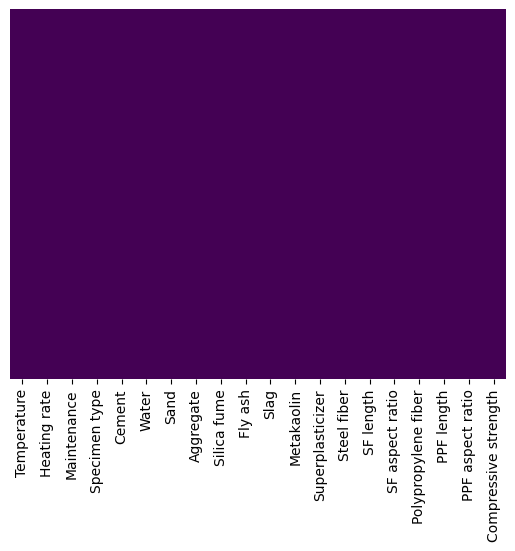

In [ ]:
# first let us try to visualize the missing columns in each and every feature
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

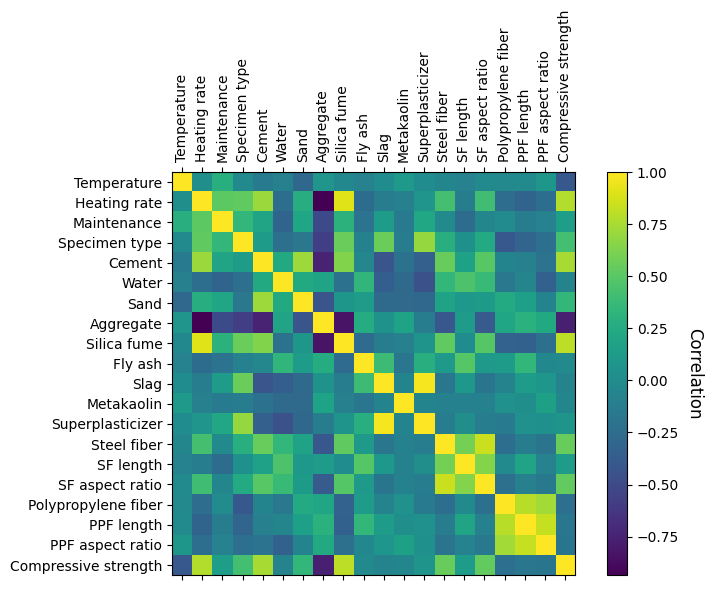

In [ ]:
# correlation plot and hist plot
fig, axes = plt.subplots(figsize=(8,6))
image = axes.matshow(new.corr())

axes.set_xticks(np.arange(new.shape[1]))
axes.set_yticks(np.arange(new.shape[1]))
axes.set_xticklabels(new.columns,rotation=90)
axes.set_yticklabels(new.columns)

cbar = axes.figure.colorbar(image, ax=axes)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()


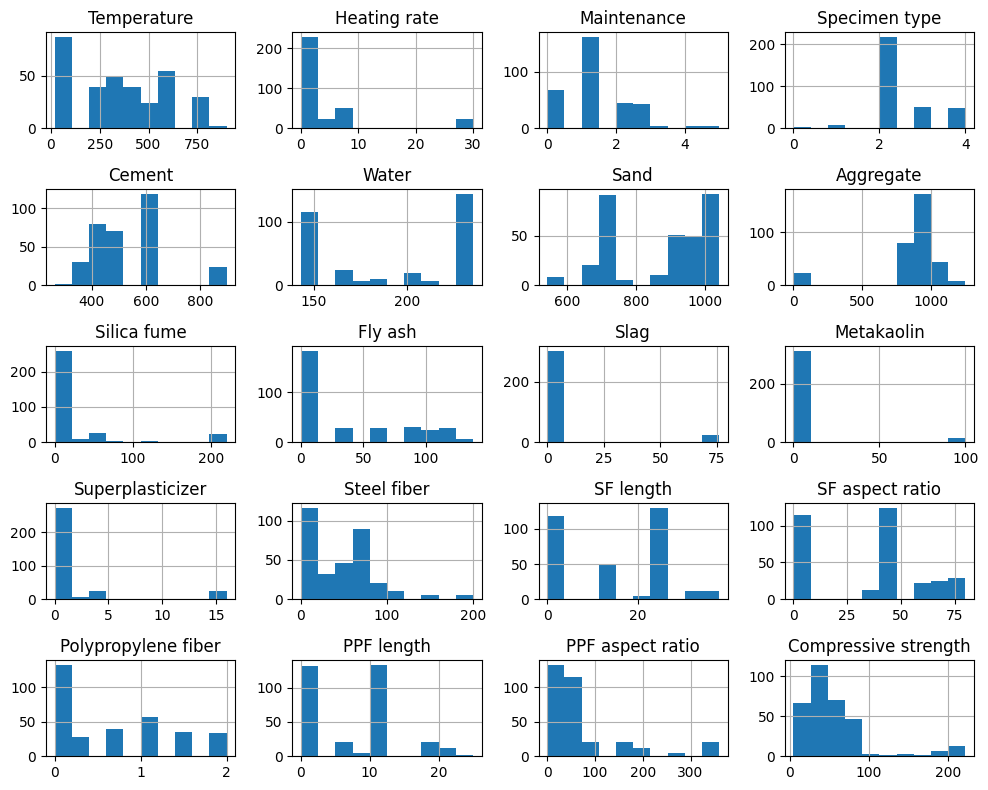

In [ ]:
#histogram view of individual columns
fig = new.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

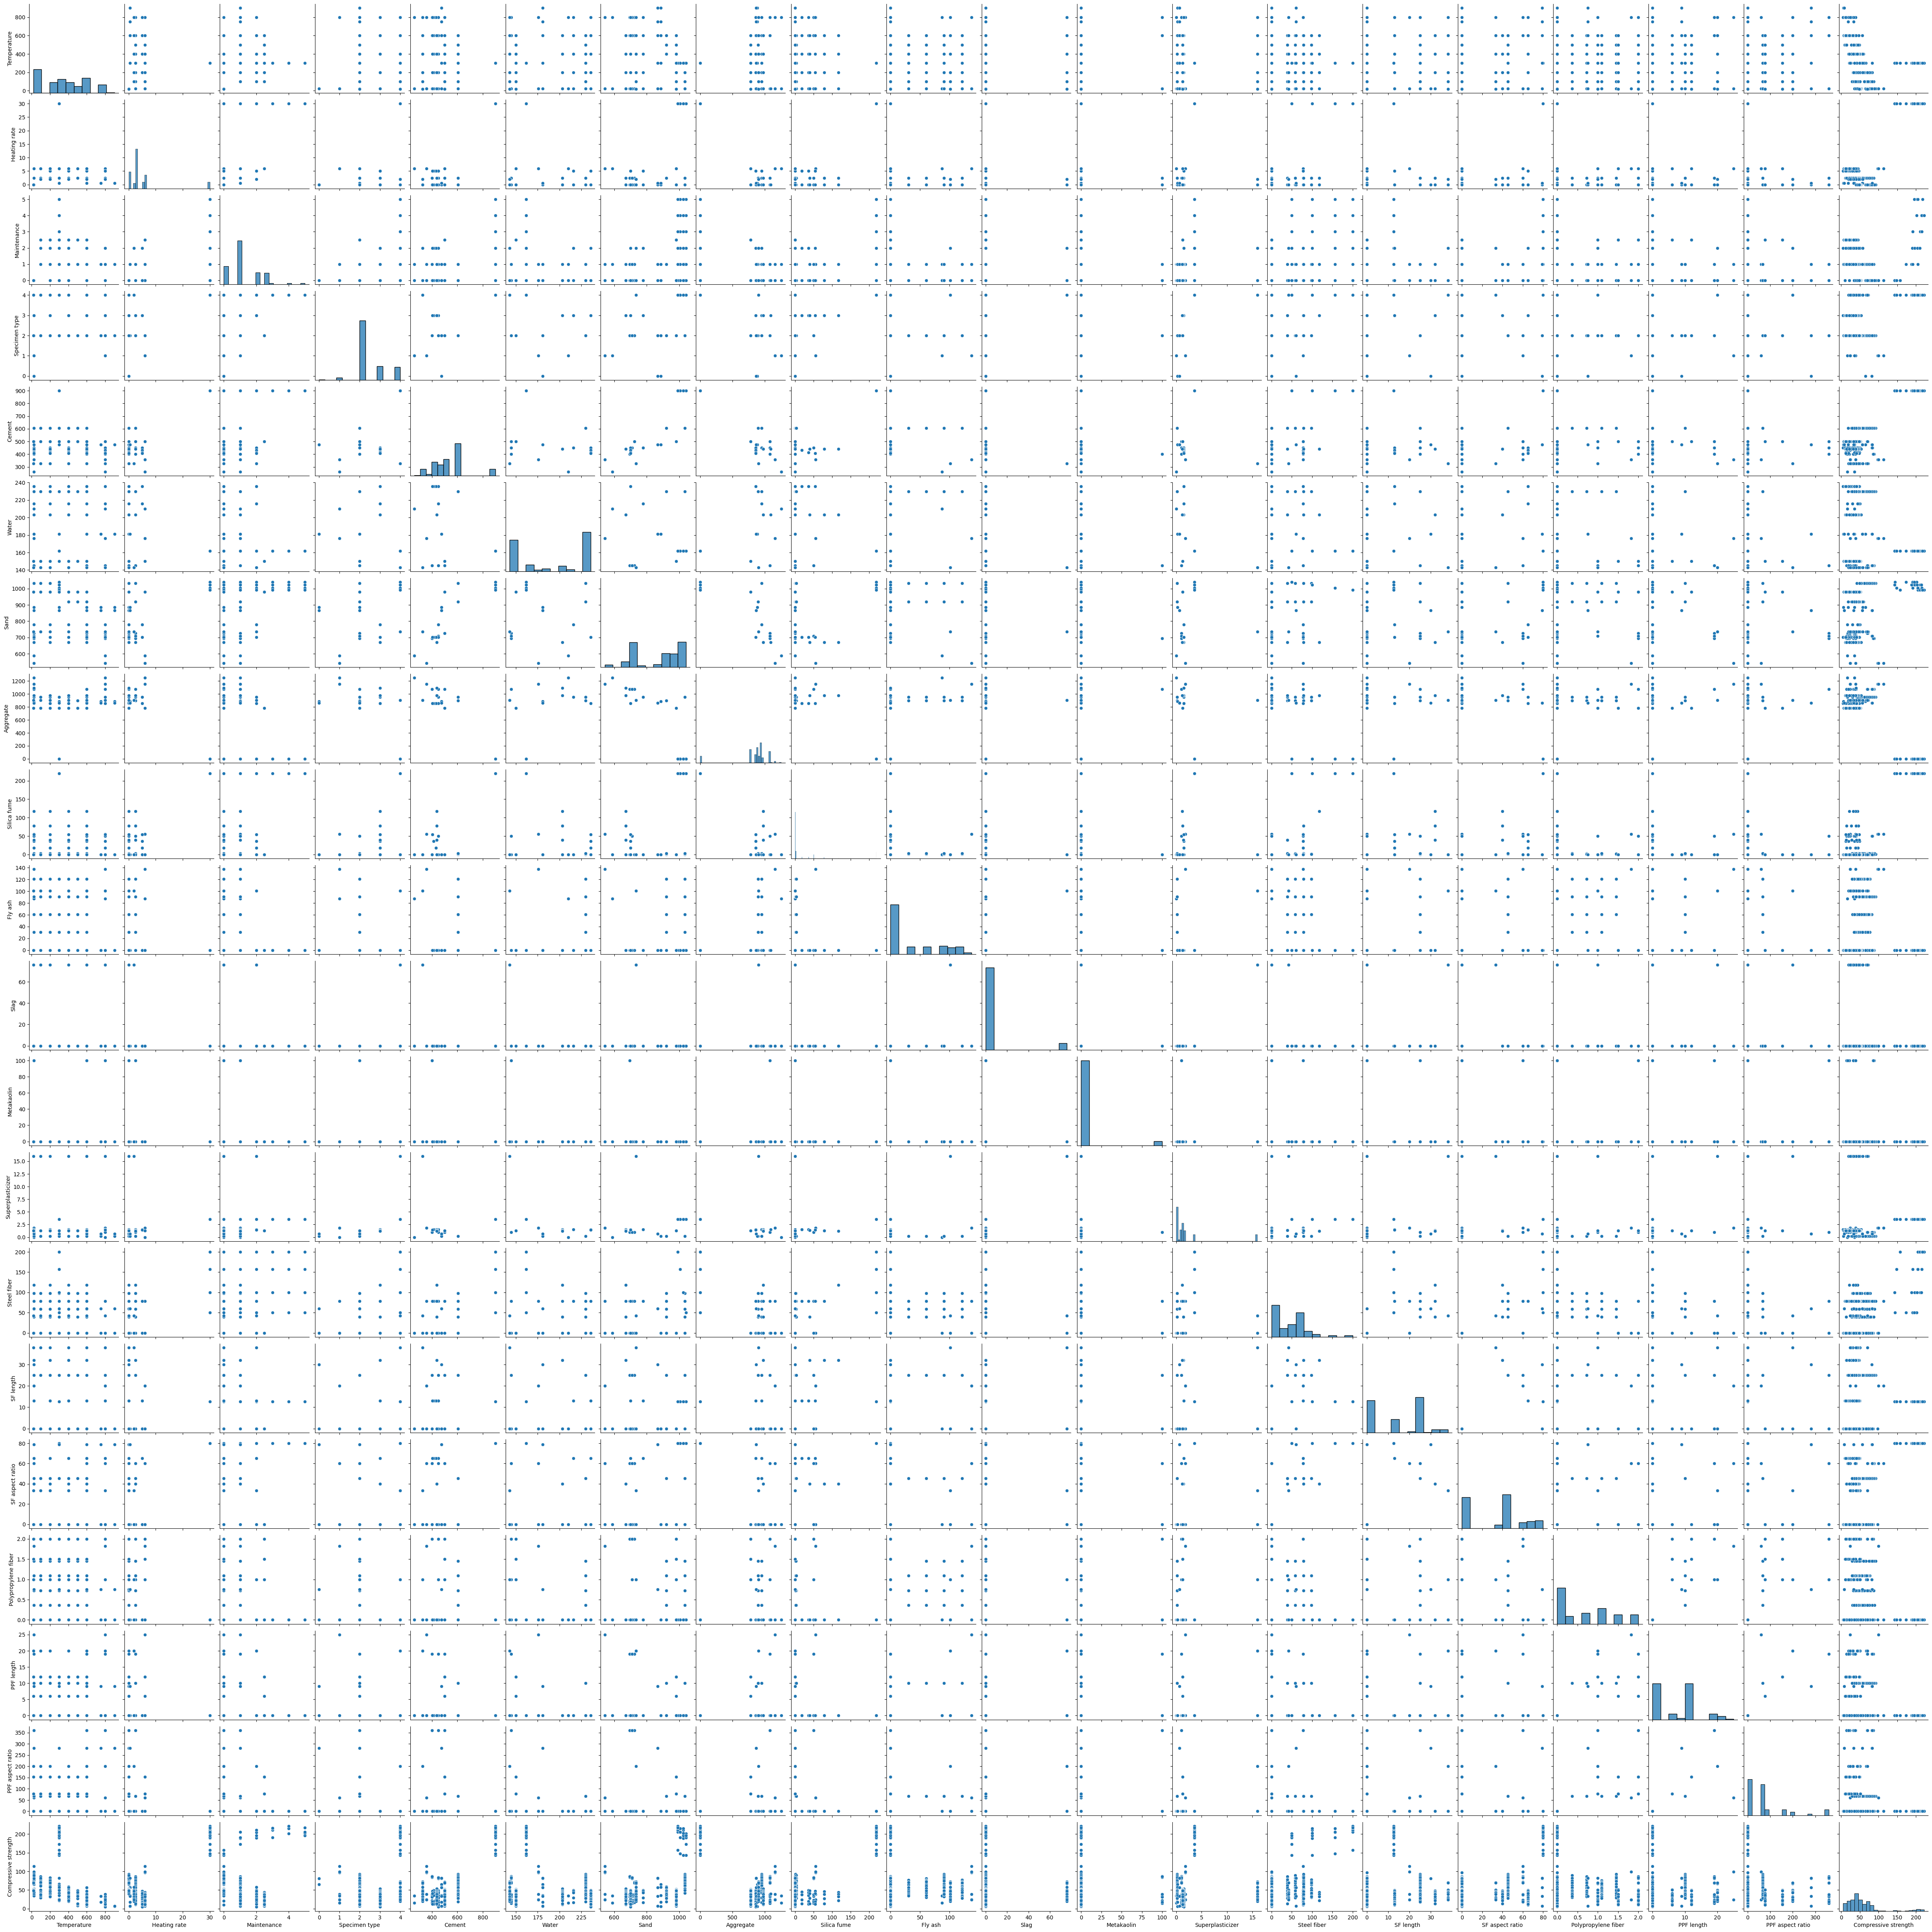

In [ ]:
sns.pairplot(new)

## are there any correlations among the features

In [ ]:
new.columns

Index(['Temperature', 'Heating rate', 'Maintenance', 'Specimen type', 'Cement',
       'Water', 'Sand', 'Aggregate', 'Silica fume', 'Fly ash', 'Slag',
       'Metakaolin', 'Superplasticizer', 'Steel fiber', 'SF length',
       'SF aspect ratio', 'Polypropylene fiber', 'PPF length',
       'PPF aspect ratio', 'Compressive strength'],
      dtype='object')

<Axes: >

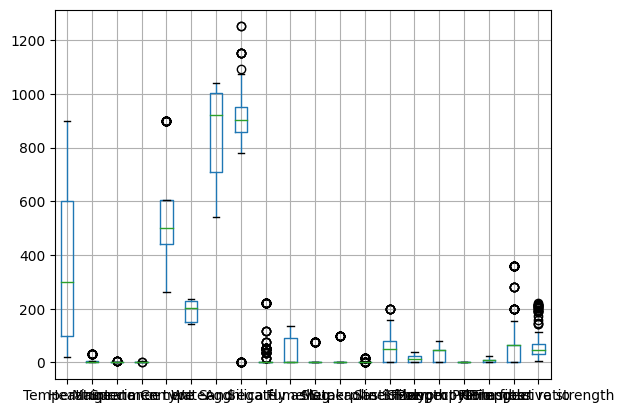

In [ ]:
new.boxplot()

<ipython-input-62-a49946af95e7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-62-a49946af95e7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-62-a49946af95e7>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

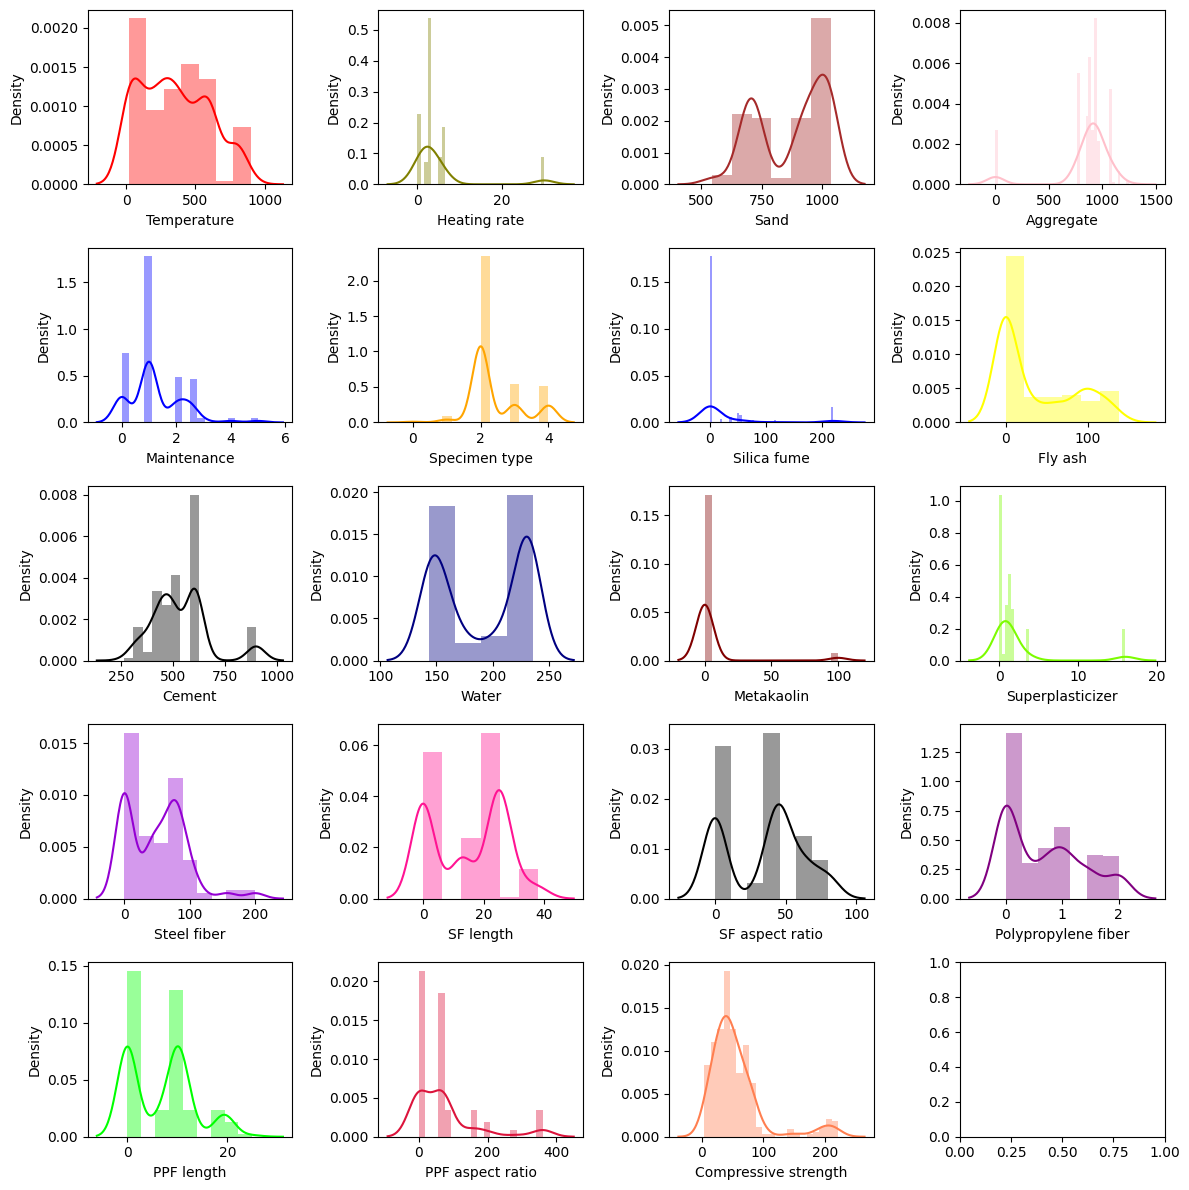

In [ ]:
#plotting the distplot for few columns
f, axes = plt.subplots(5, 4, figsize=(12, 12))
sns.distplot(new['Temperature'] , color="red", ax=axes[0, 0])
sns.distplot(new['Heating rate'] , color="olive", ax=axes[0, 1])
sns.distplot(new['Sand'] , color="brown", ax=axes[0, 2])
sns.distplot(new['Aggregate'] , color="pink", ax=axes[0, 3])
sns.distplot(new['Maintenance'] , color="blue", ax=axes[1, 0])
sns.distplot(new['Specimen type'] , color="orange", ax=axes[1, 1])
sns.distplot(new['Silica fume'] , color="blue", ax=axes[1, 2])
sns.distplot(new['Fly ash'] , color="yellow", ax=axes[1, 3])
sns.distplot(new['Cement'] , color="black", ax=axes[2, 0])
sns.distplot(new['Water'] , color="navy", ax=axes[2, 1])
sns.distplot(new[ 'Metakaolin'] , color="maroon", ax=axes[2, 2])
sns.distplot(new['Superplasticizer'] , color="lawngreen", ax=axes[2, 3])
sns.distplot(new[ 'Steel fiber'] , color="darkviolet", ax=axes[3, 0])
sns.distplot(new['SF length'] , color="deeppink", ax=axes[3, 1])
sns.distplot(new['SF aspect ratio'] , color="black", ax=axes[3, 2])
sns.distplot(new['Polypropylene fiber'] , color="purple", ax=axes[3, 3])
sns.distplot(new['PPF length'] , color="lime", ax=axes[4, 0])
sns.distplot(new['PPF aspect ratio'] , color="crimson", ax=axes[4, 1])
sns.distplot(new['Compressive strength'] , color="coral", ax=axes[4, 2])

plt.tight_layout()

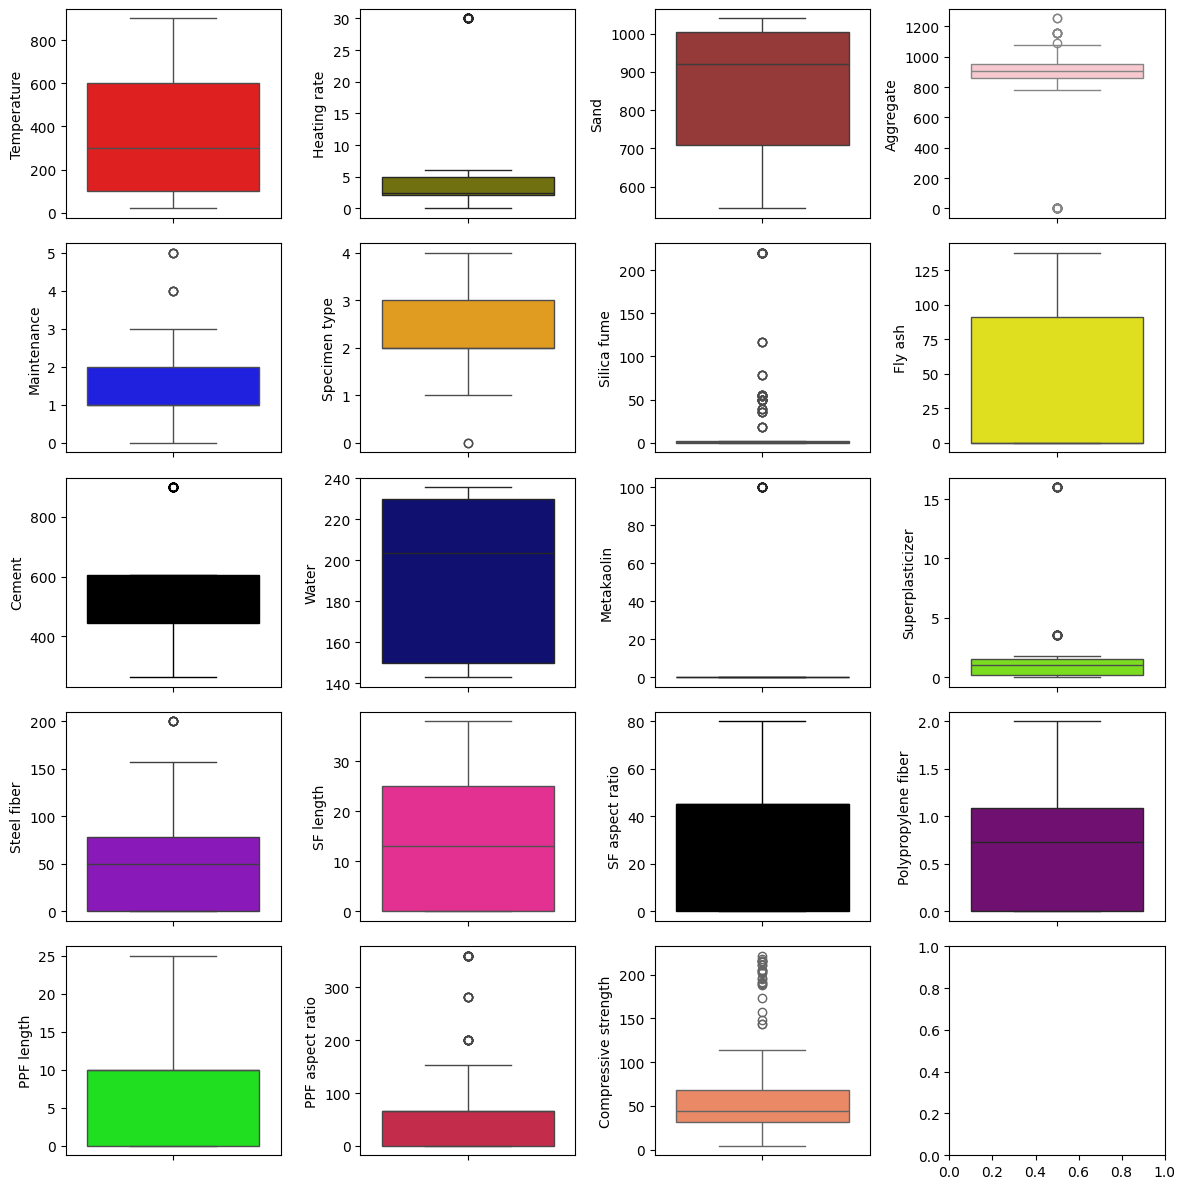

In [ ]:
#plotting the boxplot for few columns
f, axes = plt.subplots(5, 4, figsize=(12, 12))
sns.boxplot(new['Temperature'] , color="red", ax=axes[0, 0])
sns.boxplot(new['Heating rate'] , color="olive", ax=axes[0, 1])
sns.boxplot(new['Sand'] , color="brown", ax=axes[0, 2])
sns.boxplot(new['Aggregate'] , color="pink", ax=axes[0, 3])
sns.boxplot(new['Maintenance'] , color="blue", ax=axes[1, 0])
sns.boxplot(new['Specimen type'] , color="orange", ax=axes[1, 1])
sns.boxplot(new['Silica fume'] , color="blue", ax=axes[1, 2])
sns.boxplot(new['Fly ash'] , color="yellow", ax=axes[1, 3])
sns.boxplot(new['Cement'] , color="black", ax=axes[2, 0])
sns.boxplot(new['Water'] , color="navy", ax=axes[2, 1])
sns.boxplot(new[ 'Metakaolin'] , color="maroon", ax=axes[2, 2])
sns.boxplot(new['Superplasticizer'] , color="lawngreen", ax=axes[2, 3])
sns.boxplot(new[ 'Steel fiber'] , color="darkviolet", ax=axes[3, 0])
sns.boxplot(new['SF length'] , color="deeppink", ax=axes[3, 1])
sns.boxplot(new['SF aspect ratio'] , color="black", ax=axes[3, 2])
sns.boxplot(new['Polypropylene fiber'] , color="purple", ax=axes[3, 3])
sns.boxplot(new['PPF length'] , color="lime", ax=axes[4, 0])
sns.boxplot(new['PPF aspect ratio'] , color="crimson", ax=axes[4, 1])
sns.boxplot(new['Compressive strength'] , color="coral", ax=axes[4, 2])

plt.tight_layout()

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, Dense, Flatten, Lambda

from keras import backend as K


class CNN:
    def __init__(self, kernel_size=4, i_dim=19):
       self.kernel_size = kernel_size
       self.i_dim = i_dim

    def build(self):
        # Start building the model
        self.model = Sequential()
        self.model.add(Lambda(lambda x: K.expand_dims(x, axis=2)))
        # First layer Conv2D
        self.model.add(Conv1D(180, input_dim=self.i_dim, kernel_size=self.kernel_size, activation="relu", input_shape=(20, 20)))
        self.model.add(Dense(90, activation="relu"))
        # flatten the data
        self.model.add(Flatten())
        # final layer
        self.model.add(Dense(1))
        return self.model

In [ ]:
from keras.layers import LSTM, Dense, Embedding,Lambda
from keras.models import Sequential
from keras import backend as K

class LSTM_:
    def __init__(self, i_dim):
        self.i_dim = i_dim

    def build(self):
        self.model = Sequential()
        self.model.add(Lambda(lambda x: K.expand_dims(x, axis=2)))
        self.model.add(LSTM(180, activation="relu"))
        self.model.add(Dense(90))
        self.model.add(Dense(1))
        return self.model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

class SVM:
    def __init__(self, i_dim):
        self.i_dim = i_dim

    def build(self):
        self.model = Sequential()
        self.model.add(Flatten())
        self.model.add(Dense(180, input_dim=self.i_dim, activation='relu'))
        self.model.add(Dense(90, activation='relu'))
        self.model.add(Dense(1))

        return self.model

In [ ]:
dataset = "data.csv"

In [ ]:
dataset_labels = ["Temperature","Heating rate","Specimen type","Maintenance",
                "Cement","Water","Sand","Aggregate","Silica Fun1e",
                "Fly ash","Slag","Mrtakalin","S1eel fiber",
                "SF_Length","SF_Aspect ratio","Polymer fiber",
                "PF_Length","PF_Aspect ratio","Superplasticizer","Compressive strength"]

In [ ]:
def main():
    # importing dataset
    labeled_data = pd.read_csv(dataset, names=dataset_labels)
    data = pd.read_csv(dataset)
    compression = data.iloc[ :, -1:]

    # dataset overview
    index  = 1
    row    = 3
    column = 7
    fig = plt.figure(1)
    fig.canvas.manager.set_window_title('Dataset Overview')

    for label in dataset_labels:
        ax = fig.add_subplot(row, column , index)
        ax.title.set_text(label)
        ax.hist(labeled_data[label])
        plt.subplots_adjust(hspace = 1, wspace= 0.5)
        index += 1

    plt.show()

    #  Data preprocessing
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    #  split training and testing data
    x_train, x_test, y_train, y_test = train_test_split(scaled_data ,compression ,test_size=0.2)

    #  Models
    cnn = CNN_Model.CNN(4, 19)
    cnn_model = cnn.build()
    cnn_model.compile(optimizer='adam', loss='mean_absolute_error')

    svm = SVM_Model.SVM(19)
    svm_model = svm.build()
    svm_model.compile(optimizer='adam', loss='mean_absolute_error')

    lstm = LSTM_Model.LSTM_(19)
    lstm_model = lstm.build()
    lstm_model.compile(optimizer='adam', loss='mean_absolute_error')


    #  Training and testing
    print("CNN Model")
    cnn_history = cnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)
    print("SVM Model")
    svm_history = svm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)
    print("LSTM Model")
    lstm_history = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)


    #  Model evaluation
    plt.figure(2)
    plt.plot(cnn_history.history['loss'], color='blue', label='CNN')
    plt.plot(svm_history.history['loss'], color='red', label='SVM')
    plt.plot(lstm_history.history['loss'], color='yellow', label='LSTM')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(['CNN','SVM','LSTM'], loc='upper left')
    plt.show()

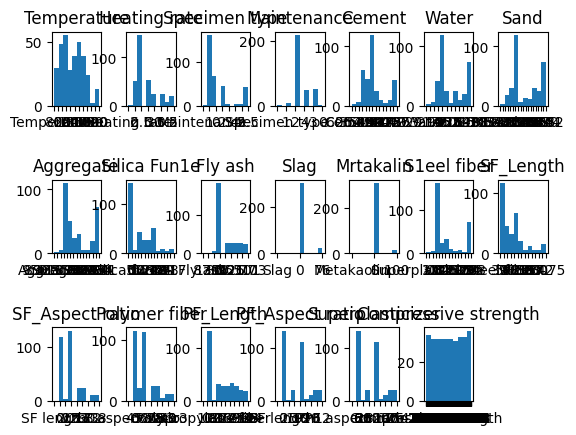

CNN Model
Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 53.8901 - val_loss: 59.9188
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 50.8665 - val_loss: 53.6850
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 39.4618 - val_loss: 35.7634
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 25.8566 - val_loss: 31.1602
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 25.4532 - val_loss: 30.0880
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 24.3233 - val_loss: 29.4275
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 24.3971 - val_loss: 29.4162
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 24.0078 - val_loss: 29.4279
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 23.9529 - val_loss: 29.1394
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 24.040

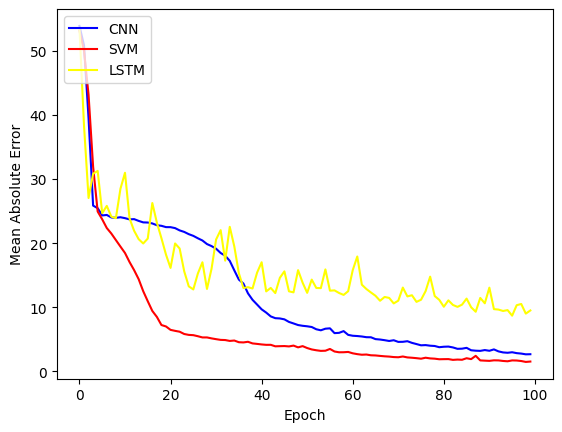

In [ ]:
# call main function
if __name__ == "__main__":main()